# Normal distribution pdf derivation

Derive:
$$
f(x)=\frac{1}{\sigma \sqrt{2\pi}}\cdot e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2}
$$

<div style={{ textAlign: 'justify' }}>

## Dart thought experiment

The dart thought experiment is a conceptual way to understand the derivation of the probability density function (PDF) of a normal distribution, often known as a Gaussian distribution. Here's an explanation of the thought experiment:

1.  **Dartboard Analogy**: Imagine a dartboard where darts are thrown randomly. Assume that the darts are more likely to hit near the center of the board and less likely to hit as you move away from the center. This setup is analogous to a random variable with a normal distribution, where values near the mean are more likely than values far from the mean.
    
2.  **Two-Dimensional Distribution**: Consider the dartboard as a two-dimensional space with the center representing the mean $(\mu)$ of the distribution. The x and y coordinates of where the dart hits can be thought of as two independent normally distributed random variables, each with its own mean $(\mu=0)$ and standard deviation $(\sigma=2)$.
    
3.  **Radial Symmetry and Distance**: The probability of a dart landing at a particular point should only depend on the distance of that point from the center, not the direction. This radial symmetry suggests that the probability density at any point depends only on the distance from the mean, not the specific x and y values.
    
4.  **Gaussian Function**: The probability of the dart landing in a small area is proportional to the exponential of the negative square of the distance from the center, scaled by the variance (σ²). Mathematically, this is described by the Gaussian function: e−(x−μ)2/(2σ2)e^{-(x-μ)^2 / (2σ^2)}e−(x−μ)2/(2σ2).
    
5.  **Normalization**: To make this a proper probability density function, it must be normalized so that the total probability over the entire space is 1. This is done by multiplying the Gaussian function by a normalization constant, which for the normal distribution is 1σ2π\\frac{1}{σ\\sqrt{2π}}σ2π​1​. This factor ensures that when the PDF is integrated over all possible values, the total probability equals 1.
    
6.  **One-Dimensional Case**: In the one-dimensional case (like measuring errors or natural phenomena), this concept is simplified to a single variable, typically representing deviations from a mean value.
    

The dart thought experiment helps visualize why the normal distribution has its bell-shaped curve: most outcomes (darts) are clustered around the average (center of the board), with fewer outcomes occurring as you move away from the average. The exact mathematical derivation of the normal distribution's PDF involves more advanced calculus, particularly the concept of limit and integration, but the dart analogy provides a good conceptual foundation.
</div>

## Simulation

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib.patches as patches

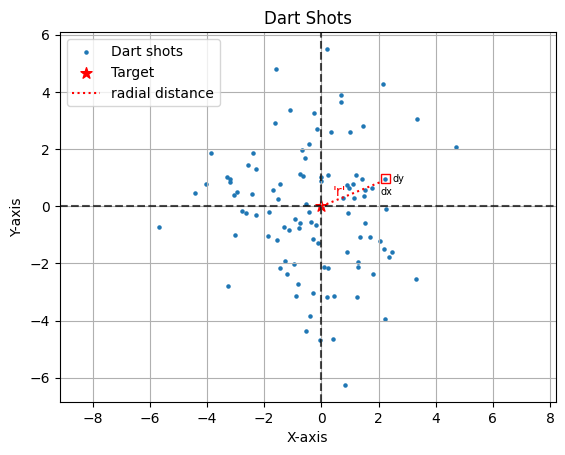

In [2]:
np.random.seed(2609)
shots=np.random.normal(0,2,(100,2))

plt.axhline(y=0, color='black', linestyle='--',alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--',alpha=0.7)

plt.scatter(shots[:,0],shots[:,1],s=5,label='Dart shots')
plt.scatter(0,0,marker='*', color='r',s=70,label='Target')
plt.plot([0,2.15], [0, 0.88], linestyle=':', color='red',label='radial distance')


# Arguments: (x, y) lower left corner, width, height
square = patches.Rectangle((2.10, 0.83), 0.3, 0.3, fill=False, color='red')  # A small square

# Get current axis and add patch
plt.gca().add_patch(square)

plt.annotate('dx',xy=(2.07, 0.4),xytext=(2.07, 0.4),fontsize=7)
plt.annotate('dy',xy=(2.5, 0.85),xytext=(2.5, 0.85),fontsize=7)
plt.annotate("'r'",xy=(2.5, 0.85),xytext=(0.4, 0.35),color='r',fontsize=10)


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Dart Shots')

plt.axis('equal')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Derivation of probability density function

### Main 

Consider a function $\phi$ which takes $x$ and $y$ coordinates and spits out the probability that the Dart shot would be in the area $dA=dx.dy$.

$\phi: \mathbb{R}\times \mathbb{R} \rightarrow [0,1] \equiv \phi: r \rightarrow [0,1]$, where $r$ is the polar coordinate.

$$
\int_{S}\phi(r)\cdot dA = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \phi(r)\cdot dx \cdot dy = 1
$$

Since $x$ and $y$ are independent,

$$
\phi(r)=f_X(x)\cdot f_Y(y),
$$
where $f_X(x)$ and $f_Y(y)$ are marginal pdfs of $X$ and $Y$.

$r$ is given by $\sqrt{x^2 + y^2}$, hence

$$
\phi(r)=\phi(\sqrt{x^2 + y^2})=f_X(x)\cdot f_Y(y).
$$

Let $y=0$ and $f_Y(0)=\lambda$, then

$$
\begin{align*}
&\phi(\sqrt{x^2 + 0^2})= \phi(x) =f_X(x)\cdot f_Y(0) = f_X(x)\cdot \lambda .\\
&\implies \phi(x) = \lambda \cdot f_X(x)\\
&\implies \phi(\sqrt{x^2 + y^2}) = \lambda \cdot f_X(\sqrt{x^2 + y^2})\\
&\implies \lambda \cdot f_X(\sqrt{x^2 + y^2}) = f_X(x)\cdot f_Y(y)
\end{align*}
$$
Divide the last equation by $\lambda^2$, we get
$$
\begin{align*}
&\implies \frac{f_X(\sqrt{x^2 + y^2})}{\lambda} = \frac{f_X(x)}{\lambda}\cdot \frac{f_Y(y)}{\lambda}.
\end{align*}
$$
Assume that both the random variables, $X$ and $Y$, have same mean and standard deviation.
$\implies f_X(.)=f_Y(.)=f(.)$ and the above equation can be written as,
$$
\begin{align*}
&\implies \frac{f(\sqrt{x^2 + y^2})}{\lambda} = \frac{f(x)}{\lambda}\cdot \frac{f(y)}{\lambda}.
\end{align*}
$$
Let $g(x)=\frac{f(x)}{\lambda}$,
$$
\begin{align*}
&\implies g(\sqrt{x^2 + y^2}) = g(x)\cdot g(y).
\end{align*}
$$

### Aside

Consider the following observations:

* $n^x \cdot n^y = n^{(x+y)}$
* $n^{x^2} \cdot n^{y^2} = n^{(x^2+y^2)}$
* Let $g(x)=e^{kx^2}$
$$\implies g(x)\cdot g(y)=e^{kx^2}\cdot e^{ky^2}=e^{k(x^2+y^2)}=g(\sqrt{x^2+y^2})$$

### Main

Now we have,
$$
\begin{align*}
&g(x)=e^{kx^2} \text{ and also } g(x) = \frac{f(x)}{\lambda}\\
&\implies f(x) = \lambda \cdot g(x) = \lambda \cdot e^{kx^2}
\end{align*}
$$
*Note:* $k$ has to be negative otherwise $f(x)$ would be an increasing function of $x$ as we have assumed that darts are more likely to hit the center of the board. To ensure $k$ to be negative, we set $k=-m^2, \forall m \in \mathbb{R}$.
$$\implies f(x)=\lambda e^{-m^2x^2}.$$

Since $f(x)$ is a pdf,
$$\int_{-\infty}^{\infty}f(x) \cdot dx = \int_{-\infty}^{\infty}\lambda e^{-m^2x^2} \cdot dx=1$$
Let $u=mx$, $\implies du=mdx$,
$$\int_{-\infty}^{\infty}\lambda e^{-m^2x^2} \cdot dx = \frac{\lambda}{m}\int_{-\infty}^{\infty} e^{-u^2} \cdot du =1$$

### Aside

$\int e^{-u^2} \cdot du$, this function resembles to the Gauss error function (erf(x)), which is the following:
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} \, dt
$$
Gauss error function does not have an analytical solution. Check [wiki](https://en.wikipedia.org/wiki/Error_function) for more information. We are going to find the numerical solution of 
$$\int_{-\infty}^{\infty} e^{-u^2} \cdot du$$

In [3]:
inf = float('inf')
def f(u):
    return (np.e)**(-(u**2))

quad(f, -inf, inf)[0]


1.772453850905516

The above value is equal to $\sqrt{\pi}$.

In [5]:
(np.pi)**(0.5)

1.7724538509055159

### Main

We had
$$
\begin{align*}
\int_{-\infty}^{\infty}f(x) \cdot dx&=\int_{-\infty}^{\infty}\lambda e^{-m^2x^2} \cdot dx = \frac{\lambda}{m}\int_{-\infty}^{\infty} e^{-u^2} \cdot du =1 \\
&=\frac{\lambda \sqrt{\pi}}{m} = 1\\
&\implies m^2=\lambda^2 \cdot \pi\\
&\implies k = -\lambda^2 \cdot \pi
\end{align*}
$$
Hence,
$$
f(x)=\lambda e^{-\lambda^2 \pi x^2}.
$$
Now let's talk about variance of $X$:
$$
Var(X)=\sigma^2=\mathbb{E}[(X-\mu_X)^2]=\int_{-\infty}^{\infty}(x-\mu_X)^2f(x)=\int_{-\infty}^{\infty}x^2 \lambda e^{-\lambda^2 \pi x^2} \cdot dx
$$
We assumed $\mu_X=0$ since the beginning. Hence,
$$
\sigma^2=\int_{-\infty}^{\infty}x^2 \lambda e^{-\lambda^2 \pi x^2} \cdot dx=\dfrac{1}{2\pi\lambda^2}
$$
[Integral.](https://www.integral-calculator.com/#expr=%28%28x-%5Cmu%29%5E2%20%5Clambda%20e%5E%7B-%5Clambda%5E2%20%5Cpi%20x%5E2%7D%29%20&lbound=minf&ubound=inf)

From the above expression, we get:
$$
\lambda=\frac{1}{\sigma\sqrt{2\pi}}
$$
$$
\implies f(x)=\frac{1}{\sigma\sqrt{2\pi}}\cdot e^{-\frac{1}{2}\left(\frac{x}{ \sigma}\right)^2}
$$

If $\mu_X$ is different from zero then in our derivation all $x's$ will be replaced by $x-\mu$ and we will get the following:
$$
f(x)=\frac{1}{\sigma\sqrt{2\pi}}\cdot e^{-\frac{1}{2}\left(\frac{x-\mu}{ \sigma}\right)^2} \qquad \qquad \blacksquare
$$
